# 부산 관광지별 국적별 카드매출 현황 데이터 사용

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("BC_BS_TRRSRT_INFLOW_NLTY_ACCTO_CARD_UTILIIZA_LIST_202112.csv")

In [3]:
df.head

<bound method NDFrame.head of                     PLC_NM    NTN_NM  CARD_USE_AMT  CARD_UTILIIZA_CAS_CO  \
0     BIFF광장&용두산공원&보수동책방골목         괌         12200                     1   
1     BIFF광장&용두산공원&보수동책방골목  남아프리카공화국         74400                     5   
2     BIFF광장&용두산공원&보수동책방골목      네덜란드        674600                    22   
3     BIFF광장&용두산공원&보수동책방골목      노르웨이       1067520                    28   
4     BIFF광장&용두산공원&보수동책방골목      뉴질랜드        614500                    30   
...                    ...       ...           ...                   ...   
5252               흰여울문화마을       프랑스         65000                     6   
5253               흰여울문화마을       프랑스          5500                     1   
5254               흰여울문화마을        호주          6500                     1   
5255               흰여울문화마을        홍콩         49500                     2   
5256               흰여울문화마을        홍콩          6000                     1   

     BASE_QUARTER  
0       2020년 1분기  
1       2020년 1분기

## 분기 기준 카드 사용량 내림차순 정렬

In [4]:
df.columns

Index(['PLC_NM', 'NTN_NM', 'CARD_USE_AMT', 'CARD_UTILIIZA_CAS_CO',
       'BASE_QUARTER'],
      dtype='object')

# 컬럼 정의
    PLC_NM                      장소명
    NTN_NM                      국가명        
    CARD_USE_AMT          카드이용금액
    CARD_UTILLIZA_CAS_CO  카드이용건수
    BASE_QUARTER              기준분기

In [5]:
# 분기 기준 오름차순 & 카드이용금액 기준 내림차순
df_sort_value = df.sort_values(by=['BASE_QUARTER', 'CARD_USE_AMT'], ascending=[True, False])
df_sort_value

,PLC_NM,NTN_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
308,센텀시티(신세계센텀 등),미국,534744908,3557,2020년 1분기
243,부산서면,미국,477713869,4016,2020년 1분기
548,해운대해수욕장,싱가폴,448048808,2046,2020년 1분기
534,해운대해수욕장,미국,430789807,3123,2020년 1분기
335,센텀시티(신세계센텀 등),중국,256674300,365,2020년 1분기
...,...,...,...,...,...
4716,송도해수욕장,라이베리아,950,1,2021년 3분기
4819,송정해수욕장,이집트,950,1,2021년 3분기
4913,자갈치·국제시장·부평깡통야시장,리투아니아,800,1,2021년 3분기
4109,감천문화마을,베네수엘라,600,1,2021년 3분기


### 각 년도별 개별 파일로 분할하여 분석(2020년도는 1~4분기, 2021년도는 3분기 까지의 데이터만 존재)

In [6]:
df_2020 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 1분기') | (df_sort_value.BASE_QUARTER=='2020년 2분기') | (df_sort_value.BASE_QUARTER=='2020년 3분기') | (df_sort_value.BASE_QUARTER=='2020년 4분기') ]
df_2020

,PLC_NM,NTN_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
308,센텀시티(신세계센텀 등),미국,534744908,3557,2020년 1분기
243,부산서면,미국,477713869,4016,2020년 1분기
548,해운대해수욕장,싱가폴,448048808,2046,2020년 1분기
534,해운대해수욕장,미국,430789807,3123,2020년 1분기
335,센텀시티(신세계센텀 등),중국,256674300,365,2020년 1분기
...,...,...,...,...,...
2434,송정해수욕장,멕시코,2000,1,2020년 4분기
2449,오륙도&이기대 갈맷길,대만,1500,1,2020년 4분기
2595,태종대,오스트리아,1500,1,2020년 4분기
2629,해운대해수욕장,벨라루스,1200,1,2020년 4분기


In [7]:
df_2021 = df_sort_value[(df_sort_value.BASE_QUARTER=='2021년 1분기') | (df_sort_value.BASE_QUARTER=='2021년 2분기') | (df_sort_value.BASE_QUARTER=='2021년 3분기') | (df_sort_value.BASE_QUARTER=='2021년 4분기') ]
df_2021

,PLC_NM,NTN_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
2917,센텀시티(신세계센텀 등),미국,534744908,3557,2021년 1분기
2852,부산서면,미국,477713869,4016,2021년 1분기
3157,해운대해수욕장,싱가폴,448048808,2046,2021년 1분기
3143,해운대해수욕장,미국,430789807,3123,2021년 1분기
2944,센텀시티(신세계센텀 등),중국,256674300,365,2021년 1분기
...,...,...,...,...,...
4716,송도해수욕장,라이베리아,950,1,2021년 3분기
4819,송정해수욕장,이집트,950,1,2021년 3분기
4913,자갈치·국제시장·부평깡통야시장,리투아니아,800,1,2021년 3분기
4109,감천문화마을,베네수엘라,600,1,2021년 3분기


In [8]:
df_2020.to_csv('./2020년_카드 이용금액 기준 내림차순 정렬.csv', index=False, encoding='euc-kr')

In [9]:
df_2021.to_csv('./2021년_카드 이용금액 기준 내림차순 정렬.csv', index=False, encoding='euc-kr')

In [10]:
df_2020['NTN_NM'].value_counts()

미국      72
중국      66
일본      65
영국      64
러시아     62
        ..
예멘       1
카메룬      1
레바논      1
짐바브웨     1
바레인      1
Name: NTN_NM, Length: 123, dtype: int64

In [11]:
df_2020.groupby("NTN_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

NTN_NM
미국     10927421851
싱가폴     4758816390
중국      3032983301
일본      1217345890
영국      1126628512
Name: CARD_USE_AMT, dtype: int64

In [12]:
card_max_2020 = df_2020.groupby("NTN_NM")['CARD_USE_AMT'].sum().max()
card_max_2021 = df_2021.groupby("NTN_NM")['CARD_USE_AMT'].sum().max()

print(card_max_2020, card_max_2021)
print(card_max_2021/card_max_2020)

10927421851 9905662710
0.9064958638064755


### 2020년과 2021년의 단순 카드 사용 내역량을 비교 했을때, 약 3배정도 증가했음을 알 수 있음

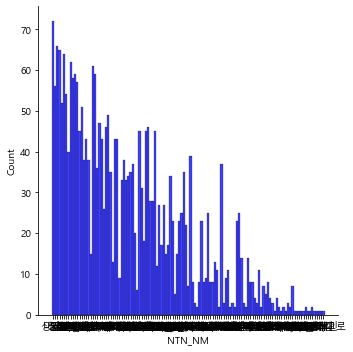

In [13]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

sns.displot(df_2020['NTN_NM'], color='blue')
plt.show()

### 카드 사용내역 기준 방문자의 출신 지역 확인 결과, 지역마다 비슷한 수의 사람이 방문한 것을 확인

In [14]:
df_202002 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 2분기')]
df_202002['NTN_NM'].value_counts()

미국          18
일본          17
호주          16
중국          16
인도네시아       16
            ..
나이지리아        1
방글라데시        1
레바논          1
키르기스스탄       1
브루나이드루살렘     1
Name: NTN_NM, Length: 97, dtype: int64

In [17]:
df_202003 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 3분기')]
df_202003['NTN_NM'].value_counts()

미국      18
중국      18
러시아     17
싱가폴     16
호주      16
        ..
잠비아      1
세르비아     1
예멘       1
모로코      1
허가리      1
Name: NTN_NM, Length: 106, dtype: int64

In [19]:
df_202004 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 4분기')]
df_202004['NTN_NM'].value_counts()

미국       18
중국       17
영국       16
러시아      16
독일       16
         ..
콩고        1
사이프러스     1
온두라스      1
볼리비아      1
우루과이      1
Name: NTN_NM, Length: 96, dtype: int64

In [21]:
df_202002.groupby("NTN_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

NTN_NM
미국     2393666978
중국      756423445
싱가폴     721528189
일본      286305172
영국      206080268
Name: CARD_USE_AMT, dtype: int64

In [25]:
df_202003.groupby("NTN_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

NTN_NM
미국     3992127664
싱가폴    1788364600
중국      890011120
영국      412063613
일본      284454670
Name: CARD_USE_AMT, dtype: int64

In [24]:
df_202004.groupby("NTN_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

NTN_NM
미국     2866316126
싱가폴    1423476532
중국      970497507
영국      327592597
일본      300861115
Name: CARD_USE_AMT, dtype: int64

In [85]:
# 방문 장소 카운트

In [27]:
df_2020['PLC_NM'].value_counts()

부산서면                    317
센텀시티(신세계센텀 등)           268
광안리해수욕장                 248
해운대해수욕장                 238
BIFF광장&용두산공원&보수동책방골목    237
자갈치·국제시장·부평깡통야시장        216
감천문화마을                  191
송도해수욕장                  180
전포카페거리                  168
동백섬&누리마루APEC하우스         126
마린시티 카페거리               110
태종대                      91
오륙도&이기대 갈맷길              84
송정해수욕장                   78
흰여울문화마을                  74
일광해수욕장                   30
을숙도                      17
부산시민공원                   15
Name: PLC_NM, dtype: int64

In [29]:
df_2020.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

PLC_NM
해운대해수욕장            7804837485
센텀시티(신세계센텀 등)      6799299071
부산서면               6509814450
광안리해수욕장            1352720501
동백섬&누리마루APEC하우스    1210066346
Name: CARD_USE_AMT, dtype: int64

In [30]:
df_202002.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

PLC_NM
부산서면               1636321085
해운대해수욕장            1508135741
센텀시티(신세계센텀 등)      1254191745
광안리해수욕장             333898295
동백섬&누리마루APEC하우스     272018033
Name: CARD_USE_AMT, dtype: int64

In [31]:
df_202003.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

PLC_NM
해운대해수욕장            3029935092
센텀시티(신세계센텀 등)      2265048665
부산서면               2017922249
광안리해수욕장             463445528
동백섬&누리마루APEC하우스     442005481
Name: CARD_USE_AMT, dtype: int64

In [32]:
df_202004.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5)

PLC_NM
센텀시티(신세계센텀 등)      2091431750
해운대해수욕장            2084118154
부산서면               1954402571
광안리해수욕장             373189596
동백섬&누리마루APEC하우스     277053587
Name: CARD_USE_AMT, dtype: int64

# 년도 별(2020, 2021) 집계

In [33]:
df_2020.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False) #장소별 카드 사용 금액

PLC_NM
해운대해수욕장                 7804837485
센텀시티(신세계센텀 등)           6799299071
부산서면                    6509814450
광안리해수욕장                 1352720501
동백섬&누리마루APEC하우스         1210066346
BIFF광장&용두산공원&보수동책방골목     734033939
자갈치·국제시장·부평깡통야시장         319921625
마린시티 카페거리                193486632
송도해수욕장                   122417365
감천문화마을                   108457015
오륙도&이기대 갈맷길               95601874
전포카페거리                    81787710
송정해수욕장                    38733419
태종대                        6762075
흰여울문화마을                    4309092
일광해수욕장                     2107889
부산시민공원                      442742
을숙도                         346378
Name: CARD_USE_AMT, dtype: int64

In [35]:
df_2020.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False) #장소별 카드 사용 횟수

PLC_NM
부산서면                    59746
해운대해수욕장                 51713
센텀시티(신세계센텀 등)           45617
광안리해수욕장                 21711
BIFF광장&용두산공원&보수동책방골목    17967
감천문화마을                   8045
자갈치·국제시장·부평깡통야시장         6060
전포카페거리                   4838
송도해수욕장                   4406
동백섬&누리마루APEC하우스          4052
마린시티 카페거리                2822
오륙도&이기대 갈맷길              2143
송정해수욕장                    870
태종대                       577
흰여울문화마을                   315
일광해수욕장                     86
부산시민공원                     41
을숙도                        39
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

In [34]:
df_2020.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 금액 상위 5개

PLC_NM
해운대해수욕장            7804837485
센텀시티(신세계센텀 등)      6799299071
부산서면               6509814450
광안리해수욕장            1352720501
동백섬&누리마루APEC하우스    1210066346
Name: CARD_USE_AMT, dtype: int64

In [36]:
df_2020.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 횟수 상위 5개

PLC_NM
부산서면                    59746
해운대해수욕장                 51713
센텀시티(신세계센텀 등)           45617
광안리해수욕장                 21711
BIFF광장&용두산공원&보수동책방골목    17967
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

In [37]:
df_2021.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False) #장소별 카드 사용 금액

PLC_NM
해운대해수욕장                 7359433717
센텀시티(신세계센텀 등)           6972727242
부산서면                    5567283686
동백섬&누리마루APEC하우스         1441667611
광안리해수욕장                 1148421438
자갈치·국제시장·부평깡통야시장         261837177
마린시티 카페거리                188322740
송도해수욕장                   127378604
오륙도&이기대 갈맷길               90392300
BIFF광장&용두산공원&보수동책방골목      79667463
전포카페거리                    64075586
감천문화마을                    47563889
송정해수욕장                    43766525
태종대                        5842758
흰여울문화마을                    5536536
일광해수욕장                     1985886
부산시민공원                      526116
국립해양박물관                     216687
을숙도                          78500
렛츠런파크                         3500
Name: CARD_USE_AMT, dtype: int64

In [38]:
df_2021.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False) #장소별 카드 사용 금액

PLC_NM
해운대해수욕장                 7359433717
센텀시티(신세계센텀 등)           6972727242
부산서면                    5567283686
동백섬&누리마루APEC하우스         1441667611
광안리해수욕장                 1148421438
자갈치·국제시장·부평깡통야시장         261837177
마린시티 카페거리                188322740
송도해수욕장                   127378604
오륙도&이기대 갈맷길               90392300
BIFF광장&용두산공원&보수동책방골목      79667463
전포카페거리                    64075586
감천문화마을                    47563889
송정해수욕장                    43766525
태종대                        5842758
흰여울문화마을                    5536536
일광해수욕장                     1985886
부산시민공원                      526116
국립해양박물관                     216687
을숙도                          78500
렛츠런파크                         3500
Name: CARD_USE_AMT, dtype: int64

In [39]:
df_2021.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 금액 상위 5개

PLC_NM
해운대해수욕장            7359433717
센텀시티(신세계센텀 등)      6972727242
부산서면               5567283686
동백섬&누리마루APEC하우스    1441667611
광안리해수욕장            1148421438
Name: CARD_USE_AMT, dtype: int64

In [40]:
df_2021.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 금액 상위 5개

PLC_NM
부산서면             47944
해운대해수욕장          44473
센텀시티(신세계센텀 등)    36646
광안리해수욕장          18056
송도해수욕장            5120
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

### 각 연도별 사용금액 대비 사용량 확인 결과 비례관계가 성립함을 알 수 있음

In [41]:
# dimension
df.shape

(5257, 5)

In [42]:
# 결측치
df.isnull().sum()

PLC_NM                  0
NTN_NM                  0
CARD_USE_AMT            0
CARD_UTILIIZA_CAS_CO    0
BASE_QUARTER            0
dtype: int64

In [43]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5257 entries, 0 to 5256
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PLC_NM                5257 non-null   object
 1   NTN_NM                5257 non-null   object
 2   CARD_USE_AMT          5257 non-null   int64 
 3   CARD_UTILIIZA_CAS_CO  5257 non-null   int64 
 4   BASE_QUARTER          5257 non-null   object
dtypes: int64(2), object(3)
memory usage: 205.5+ KB


In [45]:
# text 변수 확인

df['PLC_NM'][0]

'BIFF광장&용두산공원&보수동책방골목'

In [47]:
df['PLC_NM'][100]

'감천문화마을'

In [48]:
!pip install konlpy==0.5.2 jpype1 Jpype1-py3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
    Uninstalling beautifulsoup4-4.11.1:
      Successfully uninstalled beautifulsoup4-4.11.1


In [49]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [51]:
df['PLC_NM'][0]

'BIFF광장&용두산공원&보수동책방골목'

In [52]:
apply_regular_expression(df['PLC_NM'][0])

'광장용두산공원보수동책방골목'

In [53]:
from konlpy.tag import Okt
from collections import Counter

In [54]:
apply_regular_expression(df['PLC_NM'][0])

'광장용두산공원보수동책방골목'

In [55]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['PLC_NM'][0]))
nouns

['광장', '용두산', '공원', '보수동책방골목']

In [56]:
# 말뭉치 생성
corpus = "".join(df['PLC_NM'].tolist())
corpus

'BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골

In [57]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문

In [58]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['광장', '용두산', '보수동책방골목', '광장', '용두산', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보

In [59]:
# 빈도 탐색
counter = Counter(nouns)

In [60]:
counter.most_common(10)

[('부산', 618),
 ('서면', 618),
 ('카페', 530),
 ('거리', 530),
 ('센텀시티', 528),
 ('신세계', 528),
 ('등', 528),
 ('문화', 527),
 ('마을', 527),
 ('센텀', 521)]

In [61]:
counter.most_common(5)

[('부산', 618), ('서면', 618), ('카페', 530), ('거리', 530), ('센텀시티', 528)]

In [62]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('부산', 618),
 ('서면', 618),
 ('카페', 530),
 ('거리', 530),
 ('센텀시티', 528),
 ('신세계', 528),
 ('문화', 527),
 ('마을', 527),
 ('센텀', 521),
 ('해운대해수욕장', 493)]

In [63]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['PLC_NM'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [66]:
# 단어 리스트
word_list

['갈맷길',
 '감천',
 '거리',
 '공원',
 '광안리해수욕장',
 '광장',
 '국립',
 '국제',
 '깡통',
 '누리',
 '동백섬',
 '렛츠런',
 '마루',
 '마린시티',
 '마을',
 '문화',
 '민공',
 '박물관',
 '보수동책방골목',
 '부산',
 '부산시',
 '부평',
 '서면',
 '센텀',
 '센텀시티',
 '송도해수욕장',
 '송정해수욕장',
 '시장',
 '신세계',
 '야시장',
 '오륙도',
 '용두산',
 '을숙도',
 '이기대',
 '일광해수욕장',
 '자갈치',
 '카페',
 '태종대',
 '파크',
 '하우스',
 '해양',
 '해운대해수욕장',
 '흰여울']

In [67]:
# 각 단어가 등장한 총 횟수
count_list

array([177, 372, 530, 418, 475, 418,   5, 409, 409, 267, 267,   1, 267,
       216, 527, 527,  40,   5, 418, 618,  40, 409, 618, 528, 528, 366,
       158, 409, 528, 409, 177, 418,  26, 177,  56, 409, 530, 163,   1,
       267,   5, 493, 155], dtype=int64)

In [68]:
# 각 단어의 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [69]:
bow_vect.shape

(5257, 43)

In [70]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'갈맷길': 177,
 '감천': 372,
 '거리': 530,
 '공원': 418,
 '광안리해수욕장': 475,
 '광장': 418,
 '국립': 5,
 '국제': 409,
 '깡통': 409,
 '누리': 267,
 '동백섬': 267,
 '렛츠런': 1,
 '마루': 267,
 '마린시티': 216,
 '마을': 527,
 '문화': 527,
 '민공': 40,
 '박물관': 5,
 '보수동책방골목': 418,
 '부산': 618,
 '부산시': 40,
 '부평': 409,
 '서면': 618,
 '센텀': 528,
 '센텀시티': 528,
 '송도해수욕장': 366,
 '송정해수욕장': 158,
 '시장': 409,
 '신세계': 528,
 '야시장': 409,
 '오륙도': 177,
 '용두산': 418,
 '을숙도': 26,
 '이기대': 177,
 '일광해수욕장': 56,
 '자갈치': 409,
 '카페': 530,
 '태종대': 163,
 '파크': 1,
 '하우스': 267,
 '해양': 5,
 '해운대해수욕장': 493,
 '흰여울': 155}

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [56]:
print(tf_idf_vect.shape)

(2626, 46)


In [57]:
# 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 33)	0.5
  (0, 19)	0.5
  (0, 5)	0.5
  (0, 3)	0.5


In [38]:
# 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 49)
[[0.  0.  0.  0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [58]:
vect.vocabulary_

{'광장': 5,
 '용두산': 33,
 '공원': 3,
 '보수동책방골목': 19,
 '감천': 1,
 '문화': 16,
 '마을': 15,
 '광안리해수욕장': 4,
 '국립': 6,
 '해양': 43,
 '박물관': 18,
 '다대': 10,
 '해수욕장': 42,
 '분수': 23,
 '동백섬': 11,
 '누리': 9,
 '마루': 13,
 '하우스': 41,
 '렛츠런': 12,
 '파크': 40,
 '마린시티': 14,
 '카페': 38,
 '거리': 2,
 '부산': 20,
 '서면': 24,
 '부산시': 21,
 '민공': 17,
 '센텀시티': 26,
 '신세계': 30,
 '센텀': 25,
 '송도해수욕장': 27,
 '송정해수욕장': 28,
 '오륙도': 32,
 '이기대': 35,
 '갈맷길': 0,
 '을숙도': 34,
 '일광해수욕장': 36,
 '자갈치': 37,
 '국제': 7,
 '시장': 29,
 '부평': 22,
 '깡통': 8,
 '야시장': 31,
 '태종대': 39,
 '해운대해수욕장': 44,
 '흰여울': 45}

In [59]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{5: '광장', 33: '용두산', 3: '공원', 19: '보수동책방골목', 1: '감천', 16: '문화', 15: '마을', 4: '광안리해수욕장', 6: '국립', 43:...


In [2]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
from tqdm import tqdm